In [1]:
# TFM - Grupo 2 - Entrega 18/05/2024

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#%pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


# Exploratory Analysis Data - EAD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
#df_event = pd.read_csv("data/daily_calendar_with_events.csv")
#df_prices = pd.read_csv("data/item_prices.csv")
df_sales = pd.read_csv("data/item_sales.csv")

In [ ]:
# Indicador serve para quando rodar novamente todo o fonte, nao gerar impressoes de dados que nao sao mais modificados, ganhando em tempo
IndicadorProcessarNovamente = True

# Tratamento DF Event

In [ ]:
# daily_calendar_with_events.csv
df_event.info()

In [ ]:
df_event.head()

In [ ]:
colunas = df_event.columns

In [ ]:
df_event.describe(datetime_is_numeric=True)

In [ ]:
df_event['date'] = pd.to_datetime(df_event.date)
#df_event.set_index('date', inplace=True)

In [ ]:
df_event.dtypes

In [ ]:
df_event["weekyear"] = df_event['date'].dt.isocalendar().week

df_event["year"] = df_event['date'].dt.year

In [ ]:
def g(x):
    return  np.int16(str(x[0]) + str(x[1]))

df_event['yearweek'] = df_event[['year', 'weekyear']].apply(g, axis=1)

In [ ]:
colunas = ['weekday_int', 'weekyear']
df_event[colunas].astype("int8")

colunas = ['year', 'yearweek']
df_event[colunas].astype("int16")

In [ ]:
colunas = df_event.columns

In [ ]:
df_event.info()

In [ ]:
# Substituir linhas com valores NaN por 'Normalday'

df_event.fillna('Normalday', inplace=True)

In [ ]:
df_event['event'].value_counts()

# Tratamento DF Prices

In [ ]:
# item_prices.csv
df_prices.info()

In [4]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


In [19]:
df_prices.describe(datetime_is_numeric=True)

,item,category,store_code,yearweek,sell_price
count,"6,965,706.00","6,965,706.00","6,965,706.00","6,721,786.00","6,965,706.00"
mean,"1,516.45",1.28,4.48,"201,382.42",5.52
std,879.78,0.76,2.89,145.02,4.39
min,0.00,0.00,0.00,"201,105.00",0.01
25%,754.00,1.00,2.00,"201,248.00",2.62
50%,"1,512.00",1.00,4.00,"201,410.00",4.20
75%,"2,285.00",2.00,7.00,"201,515.00",7.18
max,"3,048.00",2.00,9.00,"201,617.00",134.15


In [5]:
df_prices.query("yearweek.isnull()").head()

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15


In [23]:
colunas = df_prices.columns

In [8]:
# Adicionado zero para a semana do ano que esta null
df_prices["yearweek"].fillna(0, inplace=True)

NameError: name 'df_prices' is not defined

In [7]:
colunas = ['yearweek']
df_prices[colunas].astype("int16")

,yearweek
0,4720
1,4721
2,4722
3,4723
4,4724
...,...
6965701,0
6965702,0
6965703,0
6965704,0


In [8]:
colunas = df_prices.columns
colunas

Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')

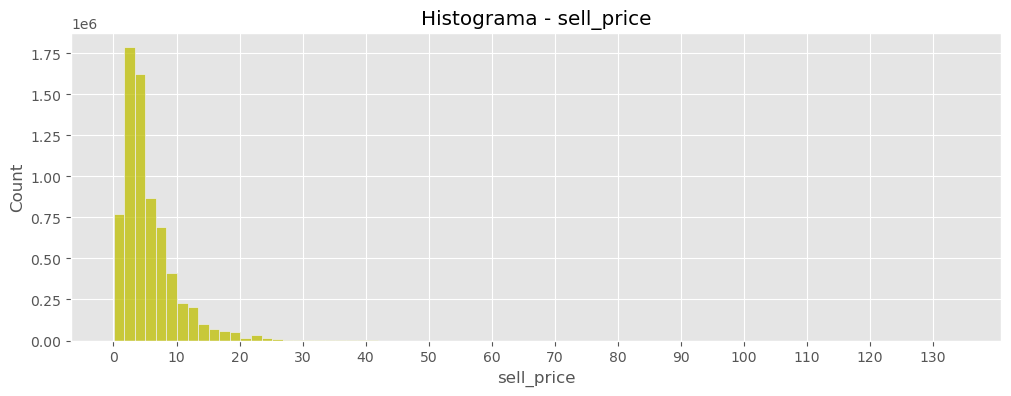

In [27]:
plt.figure(figsize=(12, 4), dpi=100)
sns.histplot(df_prices["sell_price"], bins = 80, color='y')

# Define os intervalos dos rótulos do eixo x
plt.xticks(range(0, int(df_prices["sell_price"].max()) + 1, 10))

plt.title("Histograma - sell_price")
plt.show()

# Tratamento DF Sales

In [4]:
#item_sales.csv

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [5]:
df_sales.head(100)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,12,15,0,...,0,0,1,37,3,4,6,3,2,1
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2,0,7,...,0,0,1,1,6,0,0,0,0,0
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,1,...,1,0,0,0,0,0,0,2,0,2


C:\Users\bolon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


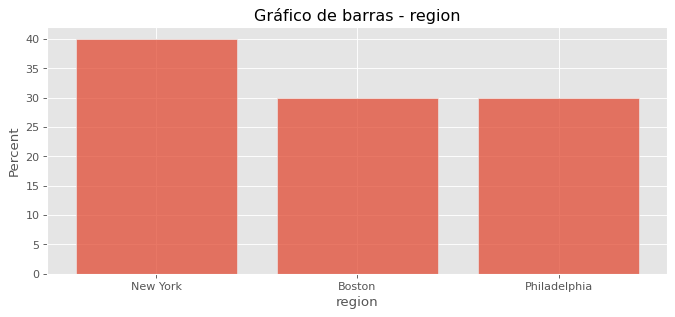

In [6]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df_sales, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

In [7]:
df_sales['region'].value_counts(normalize=True)

region
New York       0.40
Boston         0.30
Philadelphia   0.30
Name: proportion, dtype: float64

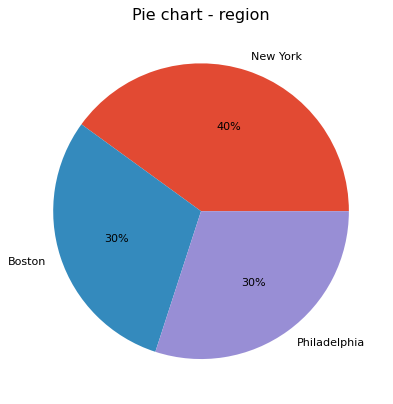

In [8]:
plt.figure(figsize=(6, 6), dpi=80, facecolor='white')
plt.pie(df_sales['region'].value_counts(normalize=True)*100, labels = df_sales['region'].value_counts(normalize=True).index, autopct='%.0f%%')
plt.title("Pie chart - region")
plt.show()

In [9]:
df_sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00",...,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00"
mean,1.07,1.04,0.78,0.83,0.63,0.96,0.92,1.24,1.07,0.84,...,1.37,1.59,1.69,1.25,1.23,1.16,1.15,1.33,1.61,1.63
std,5.13,5.37,3.67,4.42,3.38,4.79,5.06,6.62,5.92,4.21,...,3.74,4.10,4.36,3.28,3.13,2.88,2.95,3.36,4.09,3.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
max,360.00,436.00,207.00,323.00,296.00,314.00,316.00,370.00,385.00,353.00,...,129.00,160.00,204.00,98.00,100.00,88.00,77.00,141.00,171.00,130.00


In [10]:
colunas = df_sales.columns
colunas

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [11]:
# list_columns = ""
lista_valores = []

for i in range(1, 1914):
    # Adiciona o valor "d_" seguido do número à lista
    lista_valores.append("d_" + str(i))

df_sales[lista_valores].astype("int16")

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [12]:
vendas = df_sales.iloc[:, 7:]
vendas

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [13]:
soma_vendas = vendas.sum(axis=1)

In [14]:
df_sales["Total_de_Vendas"] = soma_vendas

In [15]:
df1 = df_sales[["id", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,id,Total_de_Vendas
8412,SUPERMARKET_3_090_NYC_3,250502
18055,SUPERMARKET_3_586_BOS_2,192835
21104,SUPERMARKET_3_586_BOS_3,150122
8908,SUPERMARKET_3_586_NYC_3,134386
2314,SUPERMARKET_3_090_NYC_1,127203
29755,SUPERMARKET_3_090_PHI_3,121434
17559,SUPERMARKET_3_090_BOS_2,119496
20608,SUPERMARKET_3_090_BOS_3,114854
17721,SUPERMARKET_3_252_BOS_2,114153
15006,SUPERMARKET_3_586_BOS_1,112454


In [16]:
df1 = df_sales[["store", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,store,Total_de_Vendas
8412,Tribeca,250502
18055,Roxbury,192835
21104,Back_Bay,150122
8908,Tribeca,134386
2314,Greenwich_Village,127203
29755,Queen_Village,121434
17559,Roxbury,119496
20608,Back_Bay,114854
17721,Roxbury,114153
15006,South_End,112454


In [17]:
df1 = df_sales[["region", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,region,Total_de_Vendas
8412,New York,250502
18055,Boston,192835
21104,Boston,150122
8908,New York,134386
2314,New York,127203
29755,Philadelphia,121434
17559,Boston,119496
20608,Boston,114854
17721,Boston,114153
15006,Boston,112454


Merge Entre DF Sales e DF Event

In [18]:
#sales_melted = df_sales.melt(id_vars=['id', 'item'], var_name='d', value_name='value_sales')

# Juntar os datasets com base na coluna 'd'
#merged_df = pd.merge(sales_melted, df_event[['d', 'date', 'yearweek', 'year']], on='d')

#merged_df.head()

NameError: name 'df_event' is not defined

In [ ]:
#merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   d            object        
 3   value_sales  object        
 4   date         datetime64[ns]
 5   yearweek     int16         
 6   year         int64         
dtypes: datetime64[ns](1), int16(1), int64(1), object(4)
memory usage: 3.2+ GB


In [ ]:
colunas = merged_df.columns

In [ ]:
# Agrupar os valores por região e data, fazendo a soma da coluna 'value' e mostrando todas as colunas
'''
sales_agg = merged_df.groupby(['id', 'item']).agg({
    'value_sales': 'sum',
    #'item':'first',
    #'category':'first',
    #'department':'first',
    #'store':'first',
    #'store_code':'first',
    #'region':'first',
    'd':'first',
    'yearweek':'first',
    'year':'first'
}).reset_index()  # Resetando o índice para criar um novo DataFrame

sales_agg.head()'''

,id,item,value_sales,d,yearweek,year
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,260,d_1,20114,2011
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,402,d_1,20114,2011
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,385,d_1,20114,2011
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,600,d_1,20114,2011
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,542,d_1,20114,2011


In [ ]:
#colunas = sales_agg.columns

In [ ]:
# Cria um novo dataframe com os dados agrupados e valore somados

#colunas = list(sales_agg.drop('value_sales', axis=1).columns)
#sales_goup = sales_agg.groupby(colunas)['value_sales'].sum().reset_index()

In [ ]:
#sales_goup.head()

,id,item,d,yearweek,year,value_sales
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114,2011,260
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114,2011,402
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114,2011,385
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114,2011,600
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114,2011,542


Merge entre DF Agrupado e DF Prices

In [ ]:
# concatena o novo dataframe agrupado com o dataframe prices para ter o valor da semana

#merged_sales_group_prices = pd.merge(sales_goup, df_prices, on=['item', 'yearweek'], how='outer')

In [ ]:
#merged_sales_group_prices.head()

,id,item,d,yearweek,year,value_sales,category,store_code,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114.0,2011.0,260,NaN,NaN,NaN
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114.0,2011.0,402,NaN,NaN,NaN
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114.0,2011.0,385,NaN,NaN,NaN
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114.0,2011.0,600,NaN,NaN,NaN
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114.0,2011.0,542,NaN,NaN,NaN


In [ ]:
#merged_sales_group_prices.info()

# Clustering

Label Encoding

In [19]:
def label_encoding(df, coluna):
  """
  Função para realizar Label Encoding em uma coluna específica de um DataFrame.

  Argumentos:
    df: DataFrame que contém a coluna a ser codificada.
    coluna: Nome da coluna a ser codificada.

  Retorno:
    DataFrame com a coluna codificada.
  """

  # Importa a biblioteca LabelEncoder do scikit-learn
  from sklearn.preprocessing import LabelEncoder

  # Cria um objeto LabelEncoder
  le = LabelEncoder()

  # Ajusta o LabelEncoder aos dados da coluna
  le.fit(df[coluna])

  # Transforma os dados da coluna em valores numéricos
  df[coluna] = le.transform(df[coluna])

  # Retorna o DataFrame com a coluna codificada
  return df

In [21]:
df = label_encoding(df_sales, 'id')
df = label_encoding(df_sales, 'item')
df = label_encoding(df_sales, 'category')
df = label_encoding(df_sales, 'department')
df = label_encoding(df_sales, 'store')
df = label_encoding(df_sales, 'store_code')
df = label_encoding(df_sales, 'region')

In [23]:
df_sales.head(1)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,Total_de_Vendas
0,3,0,0,0,2,3,1,0,0,0,...,3,0,1,1,1,3,0,1,1,600


In [78]:
df = df_sales

# Selecionar as colunas
colunas = ['item', 'region', 'Total_de_Vendas']

# Transformar em um np.array
array = df[colunas].to_numpy()

# Verificar o resultado
print(array)

# Contar as linhas
numero_linhas = len(array)

# Verificar o resultado
print("total de linhas :", numero_linhas)


[[   0    1  600]
 [   1    1  493]
 [   2    1  288]
 ...
 [3046    2 1712]
 [3047    2  702]
 [3048    2 1329]]
total de linhas : 30490


K-Means

In [79]:
from sklearn.cluster import KMeans
import numpy as np

# Normalização das features
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
array = scaler.fit_transform(array)


In [80]:
# Imputação de valores ausentes usando a mediana
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
array = imputer.fit_transform(array)

Gráfico do cotovelo - para verificar a quantidade de clusters

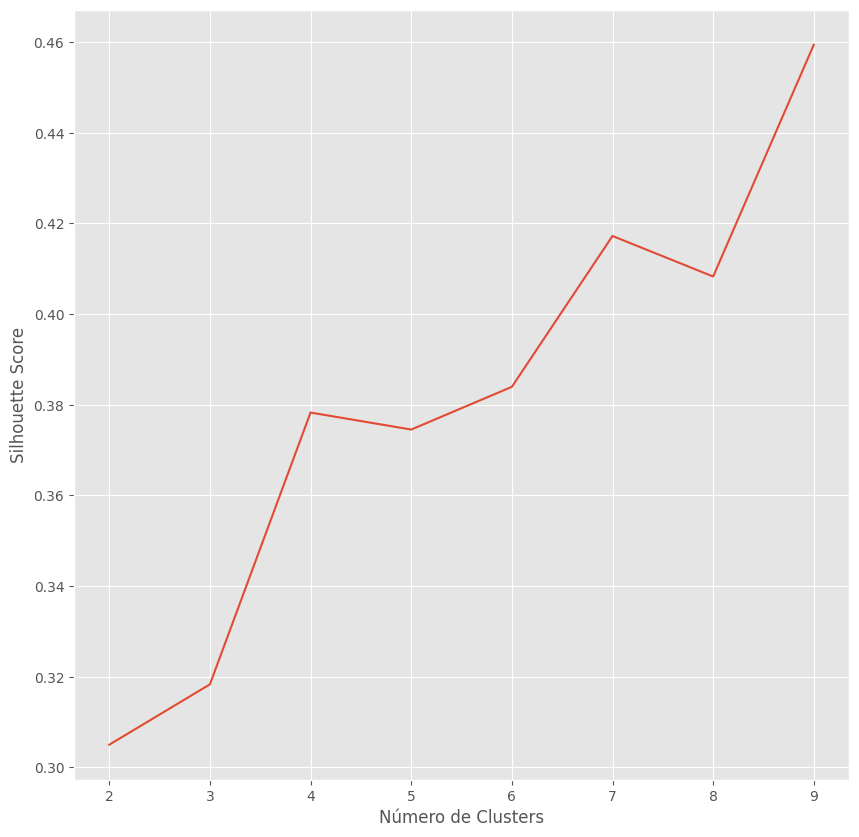

In [81]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(array)
  scores.append(silhouette_score(array, kmeans.labels_))

# Visualizar o gráfico do cotovelo
import matplotlib.pyplot as plt
plt.plot(range(2, 10), scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Treinar o modelo K-Means

In [85]:
data = array

# Vamos definir o número de clusters que queremos encontrar
num_clusters = 7  # Você pode ajustar esse valor conforme necessário

# Vamos extrair apenas as colunas relevantes para clustering (Total_de_Vendas, por exemplo)
X = data[:, 2:]  # Aqui estamos selecionando todas as linhas e apenas as colunas 2 em diante (índices 0, 1 e 2)

# Inicialize o modelo de clustering (K-Means neste caso)
kmeans = KMeans(n_clusters=num_clusters)

# Ajuste o modelo aos dados
kmeans.fit(X)

# Obtenha os rótulos de cluster para cada ponto de dados
labels = kmeans.labels_

# Agora você pode usar esses rótulos para separar seus dados em diferentes clusters
# Por exemplo, você pode criar uma lista de arrays onde cada array contém os pontos de dados pertencentes a um cluster específico

clusters = []
for i in range(num_clusters):
    cluster_i = data[labels == i]
    clusters.append(cluster_i)

# 'clusters' agora contém uma lista de arrays, onde cada array contém pontos de dados pertencentes a um cluster específico
# Você pode acessar cada cluster pelo índice na lista 'clusters'

# Exemplo de como acessar o primeiro cluster:
primeiro_cluster = clusters[0]

print("Primeiro cluster: ", clusters[0])

Primeiro cluster:  [[-1.73148283  0.         -0.29798971]
 [-1.73034669  0.         -0.31849902]
 [-1.72921054  0.         -0.35779258]
 ...
 [ 1.72921054  1.29099445 -0.08484614]
 [ 1.73034669  1.29099445 -0.27843877]
 [ 1.73148283  1.29099445 -0.158258  ]]


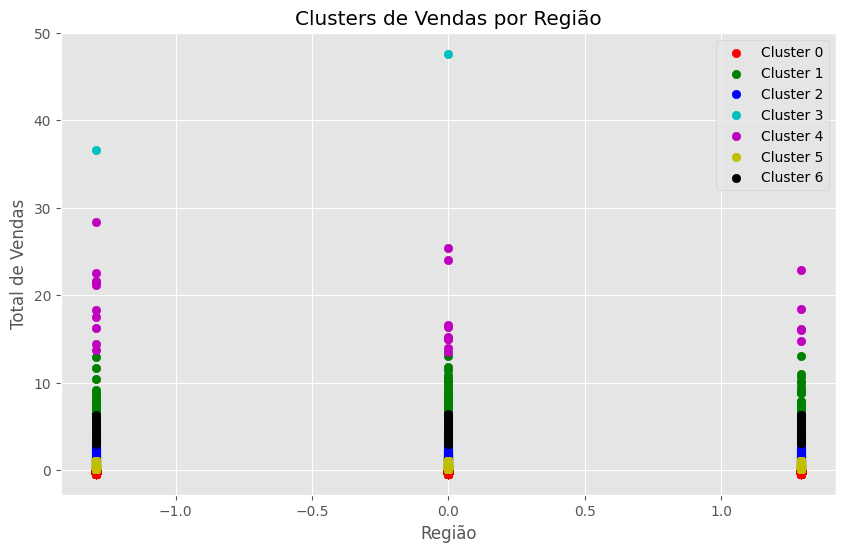

In [86]:
import matplotlib.pyplot as plt

# Agora vamos plotar os clusters
plt.figure(figsize=(10, 6))

# Cores para os clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Percorra os clusters e plote os pontos de dados pertencentes a cada cluster
for i in range(num_clusters):
    cluster_i = data[labels == i]
    plt.scatter(cluster_i[:, 1], cluster_i[:, 2], c=colors[i], label=f'Cluster {i}')

# Adicione rótulos aos eixos e título ao gráfico
plt.xlabel('Região')
plt.ylabel('Total de Vendas')
plt.title('Clusters de Vendas por Região')

# Adicione uma legenda
plt.legend()

# Mostre o gráfico
plt.show()


In [84]:
df.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,Total_de_Vendas
0,3,0,0,0,2,3,1,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,13,1,0,0,2,3,1,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,23,2,0,0,2,3,1,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,33,3,0,0,2,3,1,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,43,4,0,0,2,3,1,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
